In [1]:
import pandas as pd
import numpy as np
import duckdb as duckdb
from json import load
from typing import Dict
import matplotlib.pyplot as plt

from dotenv import load_dotenv
import os
import sys
load_dotenv()
sys.path.append(os.getenv('MODULE_PATH_data_preprocessing'))

import st00_add_fixture_ao_banco as st00

In [2]:
caminho = os.getenv('MODULE_PATH_DATA') + 'futebol.db'
SoccerPipeline = st00.SoccerPipeline(caminho)

In [3]:
df = SoccerPipeline.query_execute('SELECT * FROM fixture')

df['gols'] = df['goals_away'] + df['goals_home']

# Dicionário de mapeamento
country_translation = {
    'England': 'Inglaterra',
    'Spain': 'Espanha',
    'France': 'França',
    'Brazil': 'Brasil',
    'Germany': 'Alemanha',
    'Italy': 'Itália',
    'Netherlands': 'Holanda',
    'Argentina': 'Argentina',
    'Portugal': 'Portugal',
    'Belgium': 'Bélgica'
}

# Substituir os nomes dos países
df['league_country'] = df['league_country'].replace(country_translation)

In [4]:
df = df.groupby(['league_country', 'league_season']).agg(Media_Gols = ('gols', 'mean')).reset_index()

In [5]:
df['Media_Gols'].mean()

np.float64(2.712439997039602)

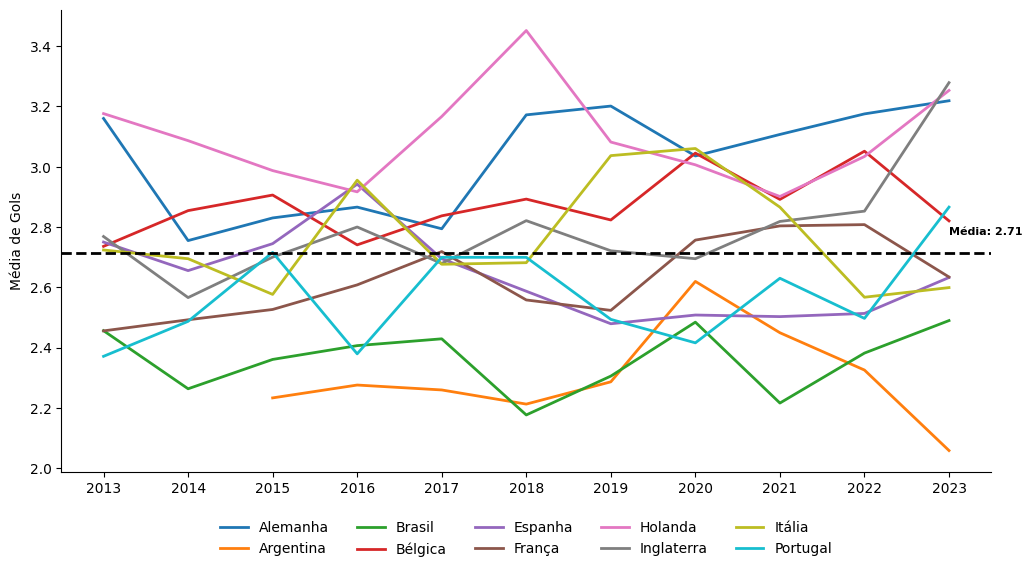

In [6]:
# Definindo o gráfico
plt.figure(figsize=(12, 6))

# Plotando os dados
for country in df['league_country'].unique():
    df_country = df[df['league_country'] == country]
    plt.plot(df_country['league_season'], df_country['Media_Gols'], label=country, linewidth=2)

# Adicionando títulos e rótulos
plt.ylabel('Média de Gols')

plt.xticks(df['league_season'].unique())

# Removendo as bordas superior e esquerda do gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Configurando a legenda na parte inferior em duas linhas
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), shadow=False, 
           ncol=5, fancybox=False, frameon=False)

media_gols = df['Media_Gols'].mean()

# Adicionando a linha da média dos gols
plt.axhline(y=media_gols, color='black', linestyle='--', linewidth=2)

# Obtendo a última temporada e o valor médio
ultima_temporada = df['league_season'].max()
valor_ultimo_ponto = df[df['league_season'] == ultima_temporada]['Media_Gols'].mean()

# Adicionando o rótulo da linha da média dos gols
plt.text(ultima_temporada, valor_ultimo_ponto, f'Média: {media_gols:.2f}', 
         color='black', va='center', ha='left', fontsize=8, fontweight='bold')



# Exibindo o gráfico
plt.grid(False)  # Removendo as linhas de grade
plt.show()